#          The Sparks Foundation
##         Task:1
##         Prediction Using Supervised ML Algo( Linear Regression )

## Author: Syed Amir Mehdi

### Importing Required Libreries

In [ ]:
import pandas as pd
import numpy as np  
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt  
%matplotlib inline


### Reading Data from Source

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Study Hours and Scores:")
#print(df)
df.head(11)

Study Hours and Scores:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Statistical Operations

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking data for noisy or missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Representaion of this data

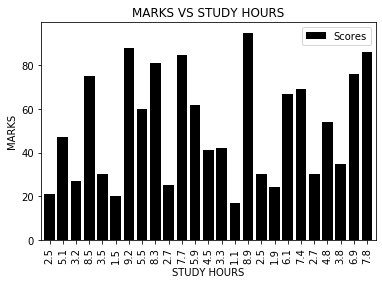

In [17]:
df.plot( x='Hours', y='Scores', kind='bar', color='black', width= 0.8 )
plt.title('MARKS VS STUDY HOURS')
plt.xlabel('STUDY HOURS')
plt.ylabel('MARKS')
plt.show()

### Finding correlation

In [18]:
df.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [23]:
# or by kendall or pearson method
df.corr(method="kendall")

,Hours,Scores
Hours,1.000000,0.884035
Scores,0.884035,1.000000


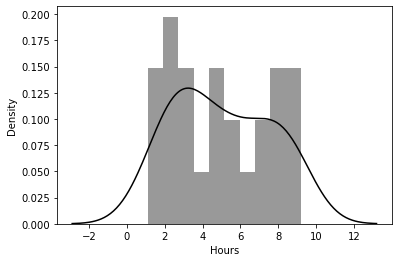

In [37]:
hours=df['Hours']
scores=df['Scores']
sn.distplot(hours, bins=10, color="black",kde=True)
plt.show()

In [ ]:
sn.distplot(scores, bins=10, color="black",kde=True)
plt.show()

### Preparing Data for training or testing

In [41]:
#Dividing data into "attributes"(inputs) and "labels"(outputs)
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [42]:
# Spliting this data into training and testing sets 
#using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

## Train Algorithm

In [43]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Trained")

Trained


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

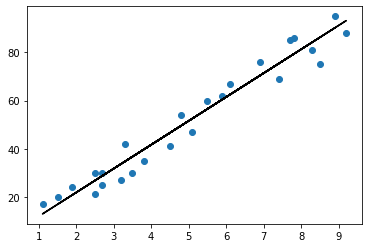

In [46]:
# Regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line ,color="black");
plt.show()

### Now Predicting some Data 

In [47]:
#Prediction
# Testing data In Hours
print(X_test) 
# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### DOING COMPARISON (actual vs predicted )

In [51]:

cdf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
#print(cdf)
cdf

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


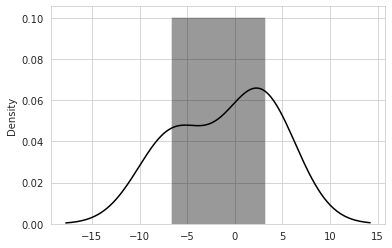

In [53]:
sn.set_style('whitegrid')
sn.distplot(y_test-y_pred , color="black")
plt.show()

In [54]:
# When a student studies 9.25 hours
hours=9.25
scores=regressor.predict([[hours]])
print('if the student study for {} hours per day the student will score {}%'.format(hours,scores))

if the student study for 9.25 hours per day the student will score [93.69173249]%


### Evaluating Model

In [55]:
#Evaluating the model
from sklearn import metrics 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
# OR

Mean Absolute Error: 4.183859899002982


In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)
# OR

21.598769307217456

In [58]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model1=sm.OLS(y_test,y_pred)
result=model1.fit()
print(result.summary())
# OR

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              478.1
Date:                Sun, 11 Jul 2021   Prob (F-statistic):                    2.59e-05
Time:                        21:01:22   Log-Likelihood:                         -14.271
No. Observations:                   5   AIC:                                      30.54
Df Residuals:                       4   BIC:                                      30.15
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
